# Lab: Continuous Training of Machine Learning Model

#### Estimated Time: 20 mins

### **Lab Summary**
In this lab, you will learn how to set up and execute a Continuous Training Pipeline for machine learning models using Apache Airflow. The pipeline monitors data drift, evaluates model performance, and retrains the model when necessary.

- Understand the concept of Continuous Training in MLOps.
- Learn how to monitor data drift and evaluate model performance.
- Execute a training pipeline with Airflow and analyze the results.

# **Directory Structure**

Understand the organization of files and folders in this repository to effectively complete the lab tasks. Below is a detailed explanation of each item:

---

## **1. `dags/`**
📌 **Description**:  
Contains the Airflow Directed Acyclic Graph (DAG) definition.

- **Purpose**:  
  - Defines the workflow pipeline for monitoring drift, training, and evaluating the model.  
  - Schedules and manages tasks using Airflow.




---

## **2. `scripts/`**
📌 **Description**:  
Includes Python scripts for various operations in the pipeline.

- **Contents**:  
  - `monitor_drift.py`: Monitors data drift between the reference and current datasets.  
  - `train_model.py`: Handles training and logging of new models.  
  - `evaluate_model.py`: Evaluates the model's performance on current and reference data.




---

## **3. `model/`**
📌 **Description**:  
Stores the deployed model and label encoder.

- **Contents**:  
  - `model.joblib`: Trained machine learning model.  
  - `label_encoder.joblib`: Encoder for categorical variables.




---

## **4. `data/`**
📌 **Description**:  
Contains reference and current datasets used for training and evaluation.

- **Contents**:  
  - `reference_data.csv`: Historical data used as a benchmark for model training.  
  - `current_data.csv`: Recent data used for drift monitoring and evaluation.




---

## **5. `Dockerfile`**
📌 **Description**:  
Defines the instructions to create a custom Docker image for Airflow with required dependencies.

- **Purpose**:  
  - Installs necessary Python packages.  
  - Sets up an environment for running Airflow and its tasks.

```dockerfile
# Use the official Python base image
FROM apache/airflow:2.5.3

# Set working directory
WORKDIR /opt/airflow

# Copy requirements file
COPY requirements.txt .

# Install dependencies
RUN pip install -r requirements.txt


---

## **5. `docker-compose.yml`**
📌 **Description**:  
Configures and orchestrates the Docker containers for the Airflow environment.

- **Purpose**:  
  - Sets up services such as **Airflow Scheduler**, **Webserver**, **Worker**, and **Postgres**.  
  - Runs the entire pipeline in a containerized environment.

---


💡  <span style="color:red"> Next Steps: </span> Proceed with the lab instructions to implement and execute the Continuous Training Pipeline.


## **Step 1: Run docker-compose to start Airflow**

Run the below command to start Airflow on port 8080


<span style="color:orange">Below command might take 1-2 mins to complete. wait for it</span>

In [ ]:
# Build the Airflow Docker image with required packages mentioned in requirements.txt

!docker-compose build

# Run the Airflow Components - Webserver, Scheduler, Worker and other
!docker-compose up -d

<span style="color:orange">Keep running below command unless all the containers are not healthy</span>


In [ ]:
# List all Docker containers. Wait for all containers to get healthy

!docker ps

<span style="color:orange">Once all containers are healthy, check Airflow UI:</span>  

[www.localhost:8080](http://www.localhost:8080)  

- **Username**: <span style="color:green">airflow</span>  
- **Password**: <span style="color:green">airflow</span>


![Airflow UI](../../images/Lab5/airflow_ui.png)

<span style="color:orange">This is your Continuous Training DAG.</span>

Navigate to the dags/ folder, review the code, and ensure that the DAG ID matches this one.

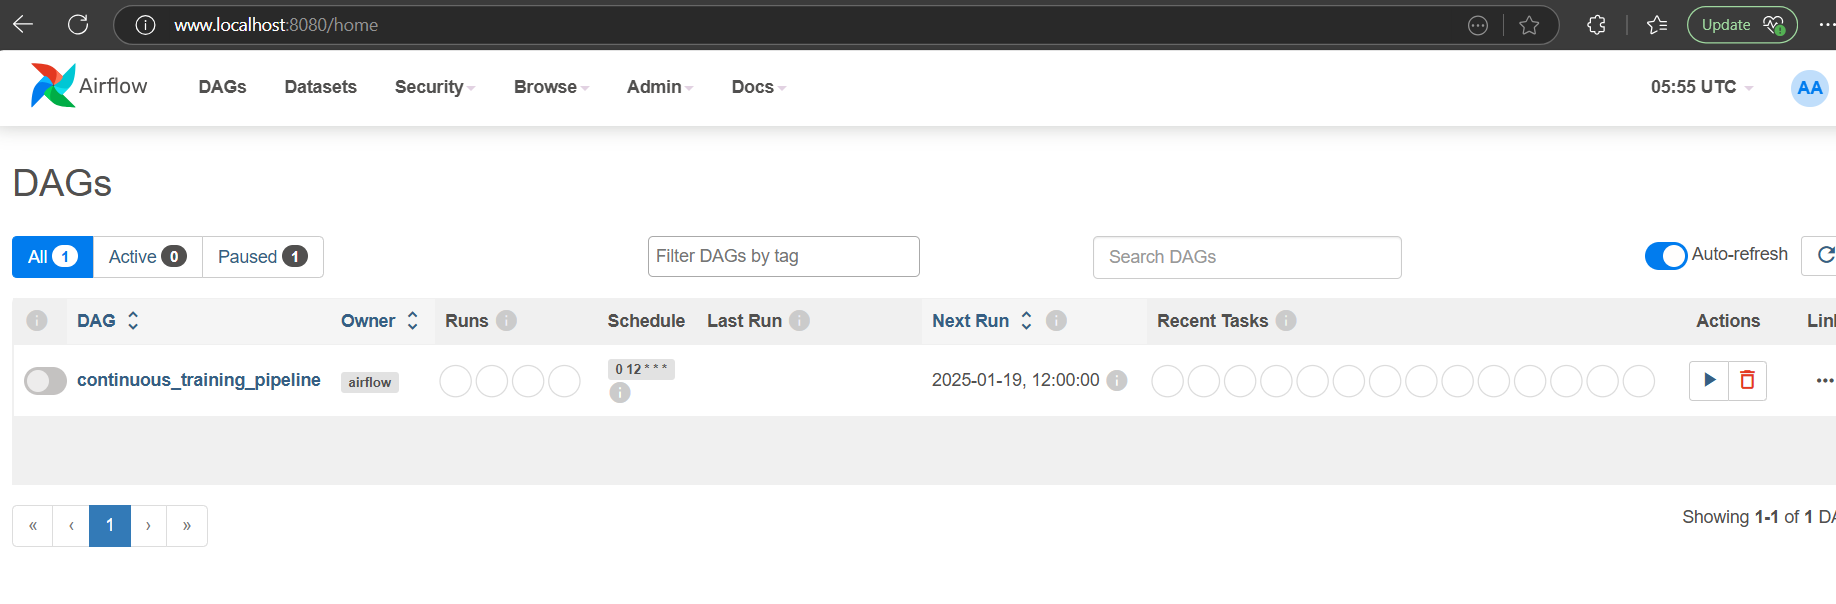

<span style="color:orange">Click on the DAG name</span> to navigate to its detailed page.

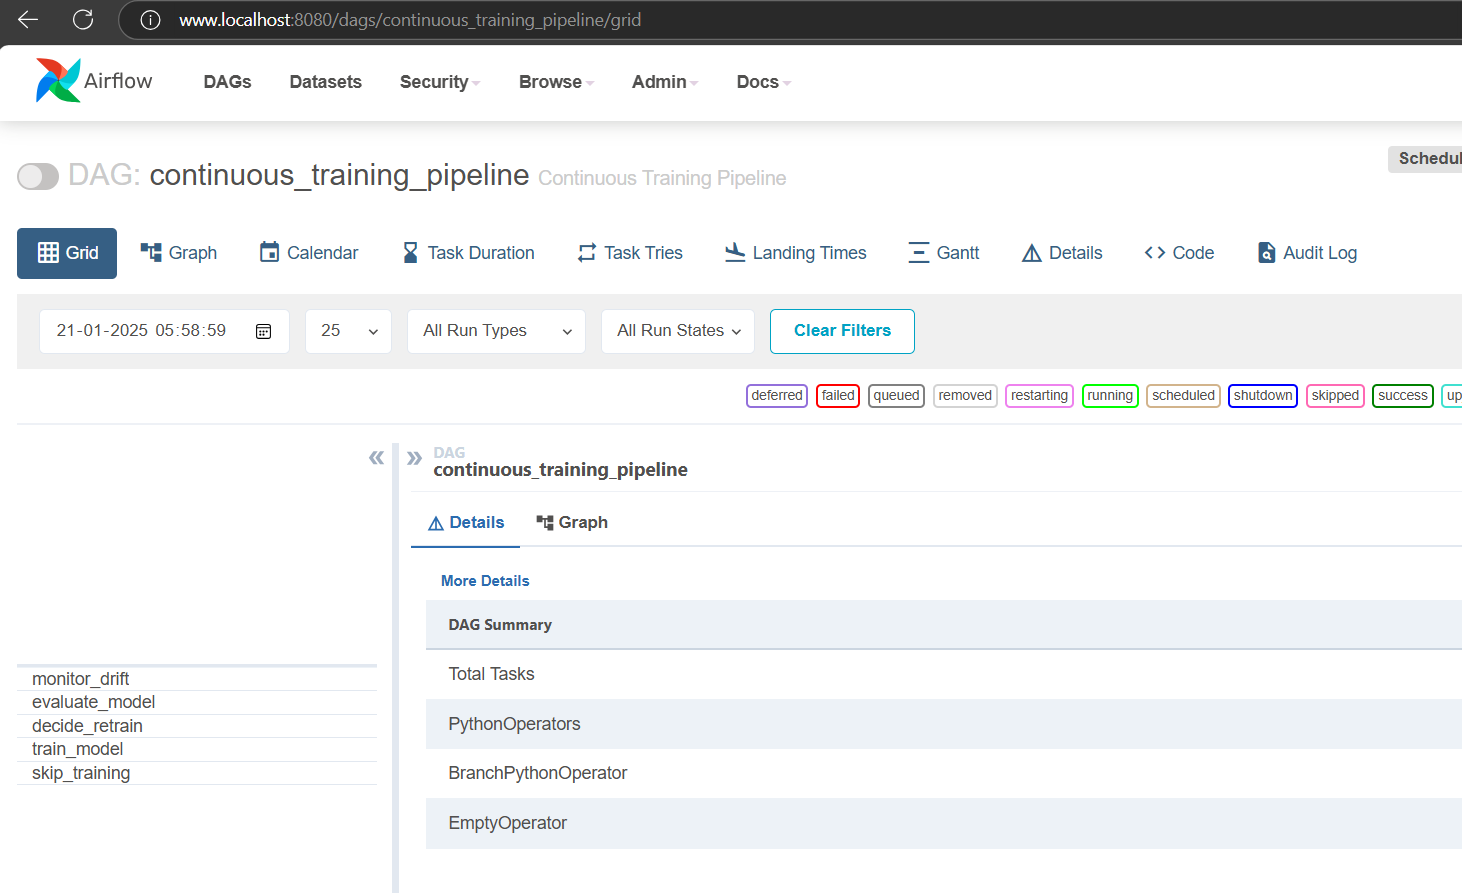

<span style="color:orange">Unpause the DAG</span>, <span style="color:green">trigger the DAG</span>, and navigate to the <span style="color:yellow">Graph View</span> to monitor the task flow and execution.

![Airflow UI](../../images/Lab5/trigger_dag.png)

<span style="color:orange">Graph View</span>

On this view, you will see the graphical view of your training pipeline and task running

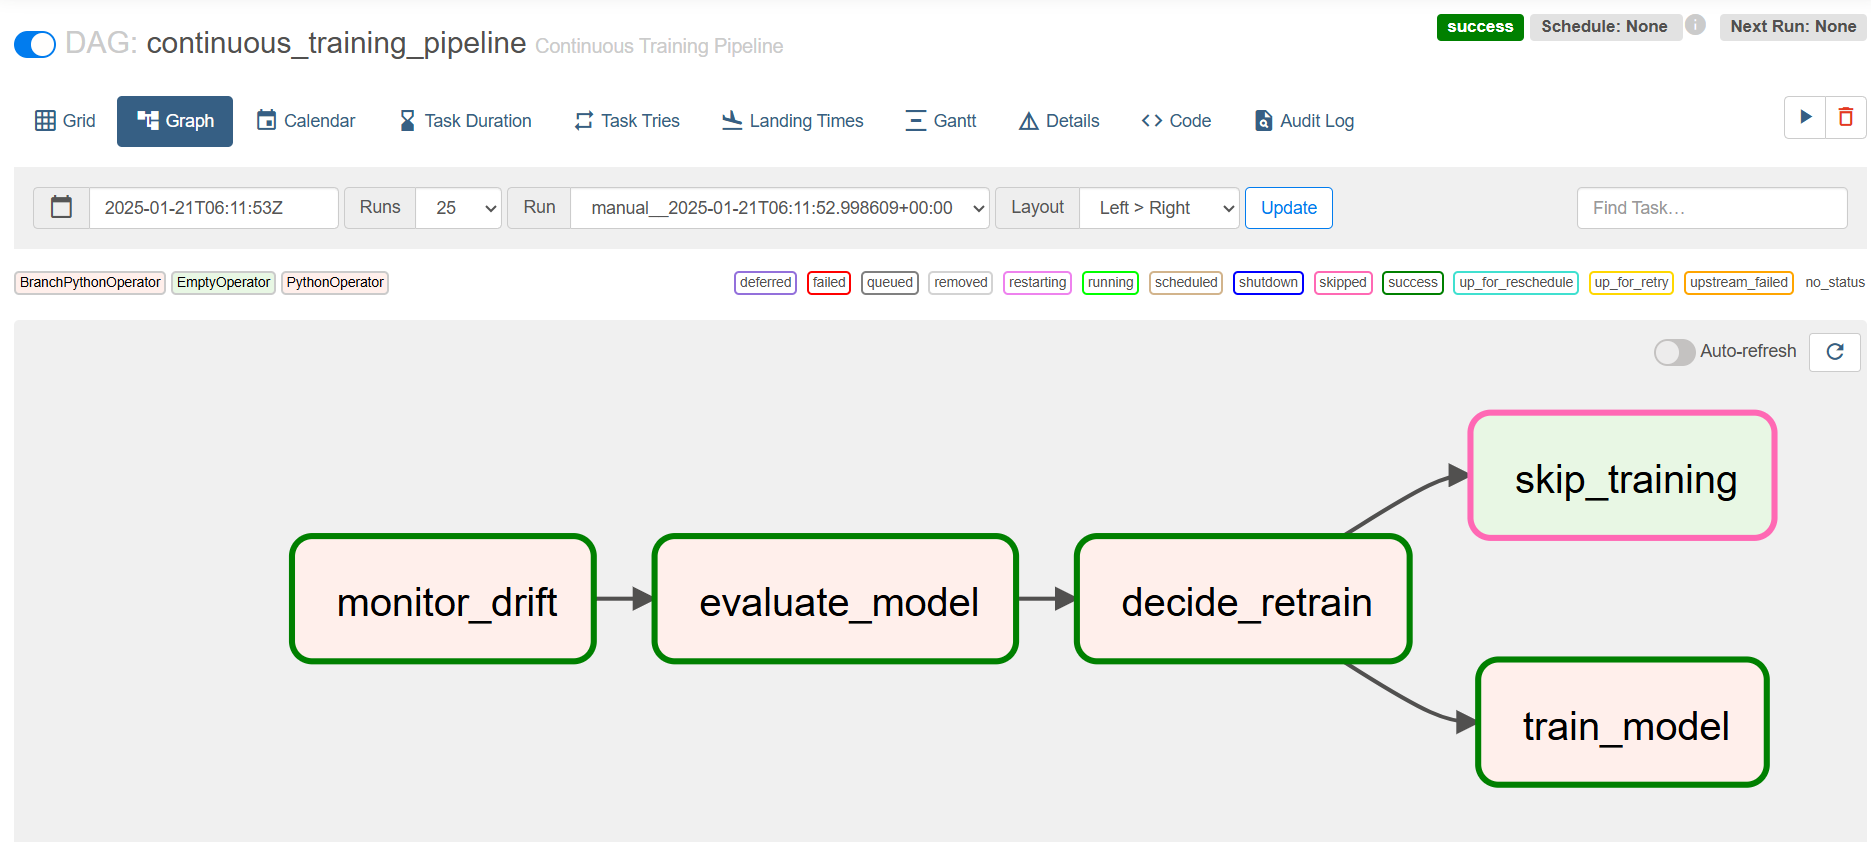

<span style="color:orange">View Logs </span>

To view the logs for these tasks, click on the task name in the Airflow UI, and then select Logs from the task details page.

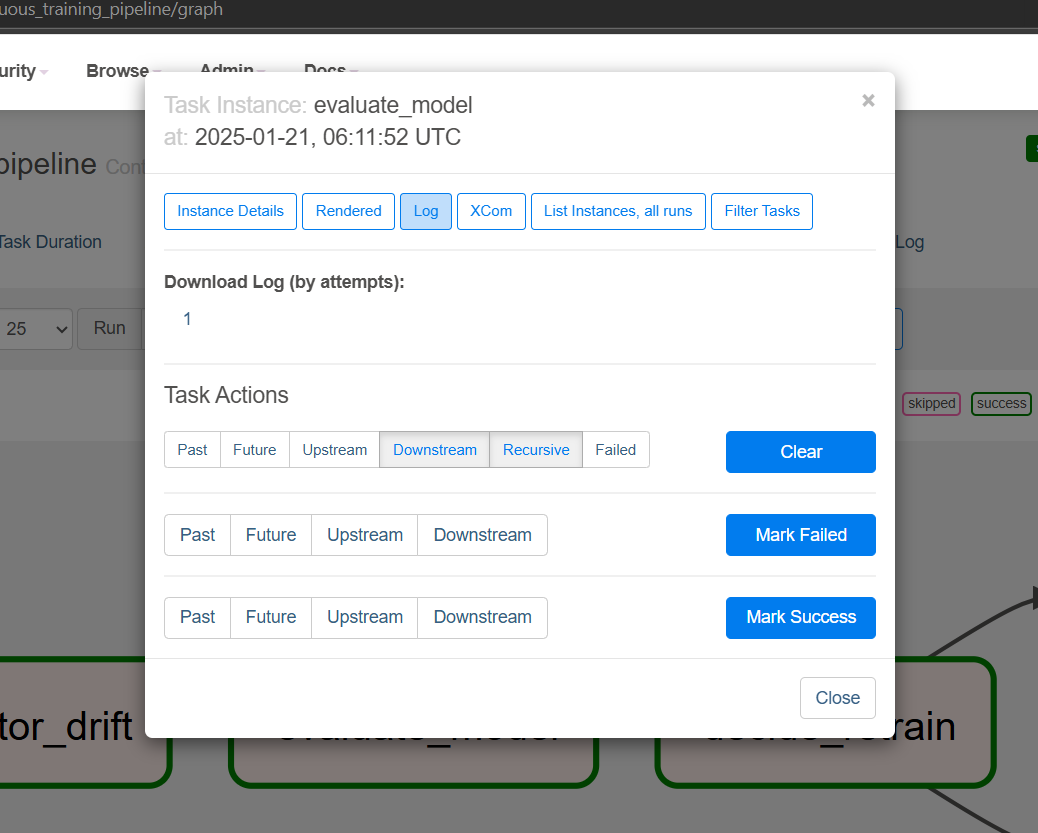

<span style="color:orange">Output </span>

After this training pipeline completes, you should see new_model.joblib and new_labe_encoder.joblib under model folder.
Check those files under model folder.

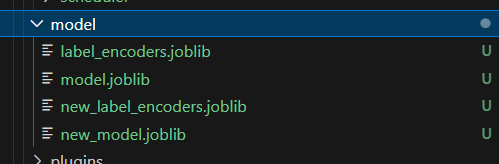

---

## **Congratulations!**
You have successfully run continuous training pipeline using Airflow